# Prediction Model Project
## This project creates different prediction models for a technology company in order to better estimate the likelyhood of retaining clients

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
churn = pd.read_csv('churn.csv')

churn.shape
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# transforms customerID in an useful column (1,2,...,7038, 7040)
churn.customerID = churn.index + 1

In [5]:
churn = churn.replace(' ', np.nan)

In [6]:
churn.isna().sum()  

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
churn['TotalCharges']=np.where(churn['TotalCharges'].isna(),churn['MonthlyCharges']*churn['tenure'],churn['TotalCharges'])

In [8]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

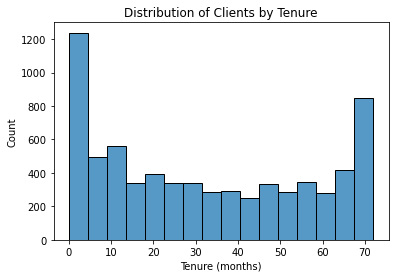

In [9]:
# Let's visualize the distribution of clientes according to how many months they
# have been a customer (tenure)
_=sns.histplot(churn.tenure).set(title='Distribution of Clients by Tenure', xlabel='Tenure (months)')

In [10]:
# transforms the columns 'tenure' into categoric 
churn.tenure = churn.tenure.map(lambda x : 'old_customer' if x > 57 else 'regular_customer')

In [11]:
churn = churn.rename(columns=str.lower) # Rename columns to lower letters
churn.gender = (churn.gender=='Female').astype('int') # Label to numeric
churn.partner = (churn.partner=='Yes').astype('int') # Label to numeric
churn.dependents = (churn.dependents=='Yes').astype('int') # Label to numeric
churn.phoneservice = (churn.phoneservice=='Yes').astype('int') # Label to numeric
churn.paperlessbilling = (churn.paperlessbilling=='Yes').astype('int') # Label to numeric
churn.totalcharges = churn.totalcharges.astype('float')
churn.churn = (churn.churn=='Yes').astype('int') # Label to numeric
churn['has_multiplelines'] = (churn.multiplelines=='Yes').astype('int') # Create new column "has_multiplelines"
churn['has_onlinesecurity'] = (churn.onlinesecurity=='Yes').astype('int') # Create new column "has_onlinesecurity"
churn['has_onlinebackup'] = (churn.onlinebackup=='Yes').astype('int') # Create new column "has_onlinebackup"
churn['has_deviceprotection'] = (churn.deviceprotection=='Yes').astype('int') # Create new column "has_deviceprotection"
churn['has_techsupport'] = (churn.techsupport=='Yes').astype('int') # Create new column "has_techsupport"
churn['has_streamingtv'] = (churn.streamingtv=='Yes').astype('int') # Create new column "has_streamingtv"
churn['has_streamingmovies'] = (churn.streamingmovies=='Yes').astype('int') # Create new column "has_streamingmovies"
churn['has_monthlycontract'] = (churn.contract=='Month-to-month').astype('int') # Create new column "has_monthlycontract"
churn['has_paymentmethod_electronic_check'] = (churn.paymentmethod=='electronic_check').astype('int') # Create new column "has_paymentmethod_electronic_check"
churn = churn.drop(['contract', 'paymentmethod', 'has_deviceprotection', 'gender', 'phoneservice', 'streamingmovies', 'streamingtv', 'techsupport', 'deviceprotection', 'onlinebackup', 'onlinesecurity', 'multiplelines'], axis=1) # Drop some features which aren't informative

churn = pd.get_dummies(churn) # Categorical values to 1-hot ("one hot" encoding is a representation of categorical variables as binary vectors)

In [12]:
# Let's convert all data to float
churn = churn.astype(float)

In [13]:
# Check all values are indeed numeric (float)
churn.dtypes

customerid                            float64
seniorcitizen                         float64
partner                               float64
dependents                            float64
paperlessbilling                      float64
monthlycharges                        float64
totalcharges                          float64
churn                                 float64
has_multiplelines                     float64
has_onlinesecurity                    float64
has_onlinebackup                      float64
has_techsupport                       float64
has_streamingtv                       float64
has_streamingmovies                   float64
has_monthlycontract                   float64
has_paymentmethod_electronic_check    float64
tenure_old_customer                   float64
tenure_regular_customer               float64
internetservice_DSL                   float64
internetservice_Fiber optic           float64
internetservice_No                    float64
dtype: object

In [14]:
churn

,customerid,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,totalcharges,churn,has_multiplelines,has_onlinesecurity,...,has_techsupport,has_streamingtv,has_streamingmovies,has_monthlycontract,has_paymentmethod_electronic_check,tenure_old_customer,tenure_regular_customer,internetservice_DSL,internetservice_Fiber optic,internetservice_No
0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,56.95,1889.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3.0,0.0,0.0,0.0,1.0,53.85,108.15,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,42.30,1840.75,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5.0,0.0,0.0,0.0,1.0,70.70,151.65,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039.0,0.0,1.0,1.0,1.0,84.80,1990.50,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7039,7040.0,0.0,1.0,1.0,1.0,103.20,7362.90,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,7041.0,0.0,1.0,1.0,1.0,29.60,346.45,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
7041,7042.0,1.0,1.0,0.0,1.0,74.40,306.60,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


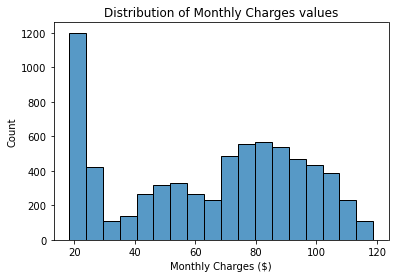

In [15]:
_ = sns.histplot(churn.monthlycharges).set(title='Distribution of Monthly Charges values', xlabel='Monthly Charges ($)')

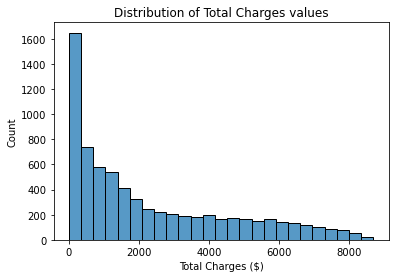

In [16]:
_ = sns.histplot(churn.totalcharges).set(title='Distribution of Total Charges values', xlabel='Total Charges ($)')

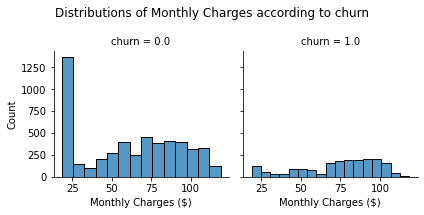

In [17]:
g = sns.FacetGrid(churn, col="churn")
g.fig.suptitle('Distributions of Monthly Charges according to churn')
_ = g.map_dataframe(sns.histplot, x="monthlycharges").set(xlabel='Monthly Charges ($)')

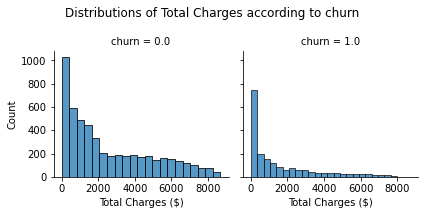

In [18]:
g = sns.FacetGrid(churn, col="churn")
g.fig.suptitle('Distributions of Total Charges according to churn')
_ = g.map_dataframe(sns.histplot, x="totalcharges").set(xlabel='Total Charges ($)')

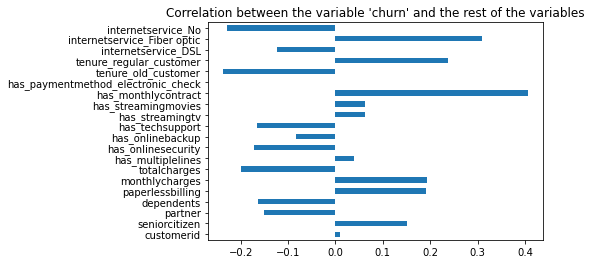

In [19]:
_ = churn.corr()['churn'].drop('churn').plot(kind='barh').set(title="Correlation between the variable 'churn' and the rest of the variables")

In [20]:
train, test = train_test_split(churn, test_size=1400, random_state=15, shuffle=True)


label = 'churn'
cid = 'customerid' ### New

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cid, axis=1) ### New
y_train = train[label]
cid_train = train[cid] ### New

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cid, axis=1) ### New
y_test = test[label]
cid_test = test[cid] ### New

In [21]:
train

,customerid,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,totalcharges,churn,has_multiplelines,has_onlinesecurity,...,has_techsupport,has_streamingtv,has_streamingmovies,has_monthlycontract,has_paymentmethod_electronic_check,tenure_old_customer,tenure_regular_customer,internetservice_DSL,internetservice_Fiber optic,internetservice_No
6034,6035.0,0.0,0.0,0.0,0.0,20.25,129.15,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5604,5605.0,0.0,0.0,0.0,1.0,70.80,1207.00,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4923,4924.0,0.0,0.0,0.0,1.0,49.75,2535.55,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3334,3335.0,0.0,0.0,0.0,1.0,106.30,4443.45,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4295,4296.0,1.0,1.0,0.0,1.0,60.95,4119.40,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,2716.0,0.0,0.0,0.0,1.0,25.25,996.45,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2204,2205.0,0.0,1.0,1.0,1.0,111.30,7482.10,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6528,6529.0,0.0,1.0,1.0,0.0,20.35,1458.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2693,2694.0,0.0,0.0,0.0,0.0,19.30,1414.80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
x_train.dtypes

seniorcitizen                         float64
partner                               float64
dependents                            float64
paperlessbilling                      float64
monthlycharges                        float64
totalcharges                          float64
has_multiplelines                     float64
has_onlinesecurity                    float64
has_onlinebackup                      float64
has_techsupport                       float64
has_streamingtv                       float64
has_streamingmovies                   float64
has_monthlycontract                   float64
has_paymentmethod_electronic_check    float64
tenure_old_customer                   float64
tenure_regular_customer               float64
internetservice_DSL                   float64
internetservice_Fiber optic           float64
internetservice_No                    float64
dtype: object

In [23]:
x_train.shape, y_train.shape, cid_train.shape, x_test.shape, y_test.shape, cid_test.shape

((5643, 19), (5643,), (5643,), (1400, 19), (1400,), (1400,))

In [24]:
x_train

,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,totalcharges,has_multiplelines,has_onlinesecurity,has_onlinebackup,has_techsupport,has_streamingtv,has_streamingmovies,has_monthlycontract,has_paymentmethod_electronic_check,tenure_old_customer,tenure_regular_customer,internetservice_DSL,internetservice_Fiber optic,internetservice_No
6034,0.0,0.0,0.0,0.0,20.25,129.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5604,0.0,0.0,0.0,1.0,70.80,1207.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4923,0.0,0.0,0.0,1.0,49.75,2535.55,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3334,0.0,0.0,0.0,1.0,106.30,4443.45,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4295,1.0,1.0,0.0,1.0,60.95,4119.40,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,0.0,0.0,0.0,1.0,25.25,996.45,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2204,0.0,1.0,1.0,1.0,111.30,7482.10,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6528,0.0,1.0,1.0,0.0,20.35,1458.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2693,0.0,0.0,0.0,0.0,19.30,1414.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
y_train

6034    0.0
5604    0.0
4923    0.0
3334    1.0
4295    0.0
       ... 
2715    0.0
2204    1.0
6528    0.0
2693    0.0
3829    1.0
Name: churn, Length: 5643, dtype: float64

In [26]:
cid_train

6034    6035.0
5604    5605.0
4923    4924.0
3334    3335.0
4295    4296.0
         ...  
2715    2716.0
2204    2205.0
6528    6529.0
2693    2694.0
3829    3830.0
Name: customerid, Length: 5643, dtype: float64

In [27]:
x_test

,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,totalcharges,has_multiplelines,has_onlinesecurity,has_onlinebackup,has_techsupport,has_streamingtv,has_streamingmovies,has_monthlycontract,has_paymentmethod_electronic_check,tenure_old_customer,tenure_regular_customer,internetservice_DSL,internetservice_Fiber optic,internetservice_No
5545,1.0,1.0,0.0,0.0,86.55,1857.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1657,0.0,0.0,0.0,1.0,25.60,901.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2218,0.0,1.0,1.0,1.0,82.00,5999.85,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4392,0.0,1.0,1.0,0.0,19.20,19.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1461,0.0,1.0,0.0,0.0,95.90,2234.95,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.0,0.0,1.0,0.0,20.55,1357.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
822,0.0,0.0,0.0,1.0,103.10,4889.30,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1325,1.0,0.0,0.0,1.0,69.25,69.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3287,0.0,1.0,1.0,1.0,100.95,1875.55,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [28]:
y_test

5545    0.0
1657    0.0
2218    0.0
4392    0.0
1461    0.0
       ... 
612     0.0
822     0.0
1325    1.0
3287    1.0
2841    0.0
Name: churn, Length: 1400, dtype: float64

In [29]:
cid_test

5545    5546.0
1657    1658.0
2218    2219.0
4392    4393.0
1461    1462.0
         ...  
612      613.0
822      823.0
1325    1326.0
3287    3288.0
2841    2842.0
Name: customerid, Length: 1400, dtype: float64

In [30]:
#from sklearn.tree import DecisionTreeClassifier # Importing the algorithm

clf = DecisionTreeClassifier(max_depth=3)
# define the algorithm:
    # arg:
        # max_depth = The maximum depth of the tree. (If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)


clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_DecisionTree = clf.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid': cid_test, 'remained_customer':y_test, 'remained_customer_by_model': y_test_pred_DecisionTree}) # saving results to DataFrame
output.to_csv('my_DecisionTree_Prediction.csv', index=False) # saving results to csv

In [31]:
output

,customerid,remained_customer,remained_customer_by_model
5545,5546.0,0.0,0.0
1657,1658.0,0.0,0.0
2218,2219.0,0.0,0.0
4392,4393.0,0.0,0.0
1461,1462.0,0.0,0.0
...,...,...,...
612,613.0,0.0,0.0
822,823.0,0.0,0.0
1325,1326.0,1.0,1.0
3287,3288.0,1.0,0.0


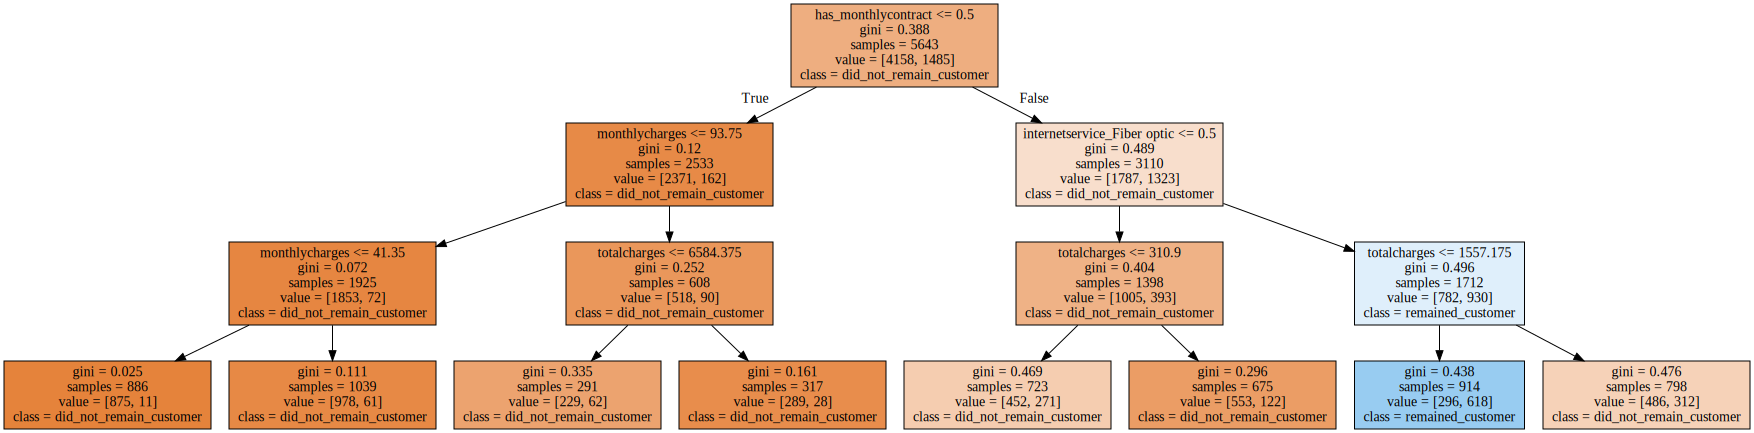

In [32]:
# Plotting the decision tree
# Importing the necessary libraries
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from IPython.display import SVG
#from graphviz import Source
#from IPython.display import display

# this is afunction that we can always use for plotting decision trees, the function expects 3 arg as follows
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

# Using the function above, with the 3 arg
    # tree
    # feaures
    # labels --> we'll go over the example and it will be clear
plot_tree(clf, x_train.columns, ['did_not_remain_customer', 'remained_customer'])


In [33]:
#from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=15)
# define the algorithm:
    # arg:
        # n_estimators = number of trees
        # max_dept = the maximum depth of the trees
        # random_state =
            # basically, an algorithm is repeated a number of times using random selections of features and samples. The random_state parameter allows controlling these random choices.
            # if you call this with random_state=1 (or any other value), then each and every time, you'll get the same result.
            
model.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_RandomForest = model.predict(x_test) # making a prediction based on "test" data features


output = pd.DataFrame({'customerid': cid_test, 'remained_customer':y_test, 'remained_customer_by_model': y_test_pred_RandomForest}) # saving results to DataFrame
output.to_csv('my_RandomForest_Prediction.csv', index=False) # saving results to csv


In [34]:
output

,customerid,remained_customer,remained_customer_by_model
5545,5546.0,0.0,0.0
1657,1658.0,0.0,0.0
2218,2219.0,0.0,0.0
4392,4393.0,0.0,0.0
1461,1462.0,0.0,0.0
...,...,...,...
612,613.0,0.0,0.0
822,823.0,0.0,0.0
1325,1326.0,1.0,1.0
3287,3288.0,1.0,0.0


In [35]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.0063605 , 0.00453252, 0.01546417, 0.0278877 , 0.08626862,
       0.09649496, 0.00201639, 0.01759943, 0.00217795, 0.0424632 ,
       0.00367788, 0.00589854, 0.31694859, 0.        , 0.0752175 ,
       0.07413113, 0.01783891, 0.15910728, 0.04591473])

In [36]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
12,has_monthlycontract,0.316949
17,internetservice_Fiber optic,0.159107
5,totalcharges,0.096495
4,monthlycharges,0.086269
14,tenure_old_customer,0.075217
15,tenure_regular_customer,0.074131
18,internetservice_No,0.045915
9,has_techsupport,0.042463
3,paperlessbilling,0.027888
16,internetservice_DSL,0.017839


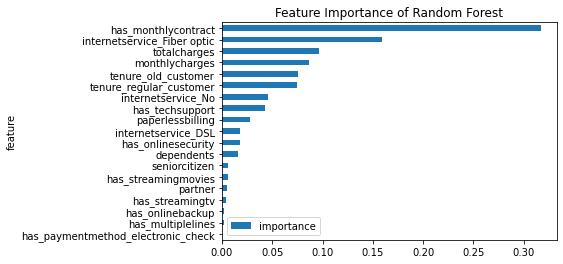

In [37]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance of Random Forest');

In [38]:
#from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors
        
clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customerid': cid_test, 'remained_customer':y_test, 'remained_customer_by_model': y_test_pred_Knn}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction.csv', index=False) # saving results to csv



In [39]:
output

,customerid,remained_customer,remained_customer_by_model
5545,5546.0,0.0,1.0
1657,1658.0,0.0,0.0
2218,2219.0,0.0,0.0
4392,4393.0,0.0,0.0
1461,1462.0,0.0,1.0
...,...,...,...
612,613.0,0.0,0.0
822,823.0,0.0,0.0
1325,1326.0,1.0,1.0
3287,3288.0,1.0,0.0


In [40]:
#from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

In [41]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.78

In [42]:
# Evaluation for Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7728571428571429

In [43]:
# Evaluation for Knn
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7428571428571429

### Testing with Decision Tree

In [44]:
# Decision Tree -- max_depth = 3 (like before)

clf = DecisionTreeClassifier(max_depth=3, random_state=15)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.78

In [45]:
# Decision Tree -- max_depth = 4

clf = DecisionTreeClassifier(max_depth=4, random_state=15)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.78

In [46]:
# Decision Tree -- max_depth = 10

clf = DecisionTreeClassifier(max_depth=10, random_state=15)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7714285714285715

### Testing with Random Forest

In [47]:
# Random Forest -- n_estimators = 100 & max_depth = 3 (like before)

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=15)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7728571428571429

In [48]:
# Random Forest -- n_estimators = 100 & max_depth = 6

model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=15)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7978571428571428

In [49]:
# Random Forest -- n_estimators = 100 & max_depth = 9

model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=15)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.8092857142857143

### Testing with KNN

In [50]:
# Knn -- n_neighbors = 3 (like before)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7428571428571429

In [51]:
# Knn -- n_neighbors = 8

clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7778571428571428

In [52]:
# Knn -- n_neighbors = 12

clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7842857142857143

In [53]:
## Seems like the algorithm overfits a bit, also we know that KNN can highly
## suffer from features that are in different scales. So let's scale the x 
## values first

In [54]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customerid': cid_test, 'remained_customer':y_test, 'remained_customer_by_model': y_test_pred_Knn, 'remained_customer_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output.to_csv('my_Knn_Prediction_scaled.csv', index=False) # saving results to csv


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.7792857142857142

In [55]:
y_train.value_counts()

0.0    4158
1.0    1485
Name: churn, dtype: int64

In [56]:
x_test

,seniorcitizen,partner,dependents,paperlessbilling,monthlycharges,totalcharges,has_multiplelines,has_onlinesecurity,has_onlinebackup,has_techsupport,has_streamingtv,has_streamingmovies,has_monthlycontract,has_paymentmethod_electronic_check,tenure_old_customer,tenure_regular_customer,internetservice_DSL,internetservice_Fiber optic,internetservice_No
5545,1.0,1.0,0.0,0.0,86.55,1857.25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1657,0.0,0.0,0.0,1.0,25.60,901.25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2218,0.0,1.0,1.0,1.0,82.00,5999.85,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4392,0.0,1.0,1.0,0.0,19.20,19.20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1461,0.0,1.0,0.0,0.0,95.90,2234.95,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.0,0.0,1.0,0.0,20.55,1357.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
822,0.0,0.0,0.0,1.0,103.10,4889.30,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1325,1.0,0.0,0.0,1.0,69.25,69.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3287,0.0,1.0,1.0,1.0,100.95,1875.55,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
import numpy as np

def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value
    

benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Did not remain a customer

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7257142857142858

### Our model results:
##### Decision tree best accuracy Result: 78%<br>
##### Random Forest best accuracy Result: 80.93%<br>
##### Knn best accuracy Result (before standardization): 78.43%<br>
##### Knn best accuracy Result (after standardization): 77.93%<br>
### The performance on the baseline test is 72.57%, we can see, that any of our algorithms beats the benchmark performance.